[*********************100%%**********************]  1 of 1 completed


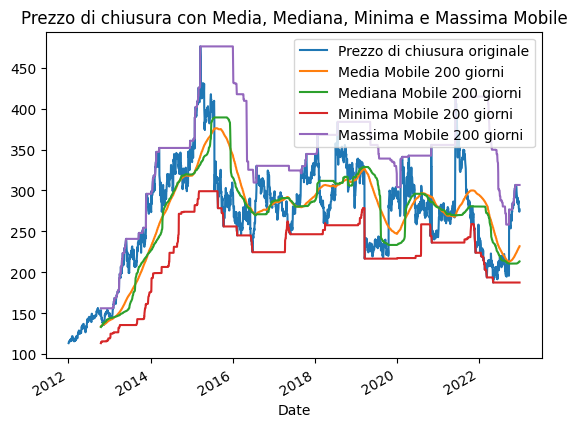

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to download stock data from Yahoo Finance
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate and display the moving average, moving median, moving minimum, and moving maximum
def plot_moving_averages(stock_data, window_size):
    stock_data['Close'].plot(label='Prezzo di chiusura originale', legend=True)

    # Media mobile
    stock_data['Close'].rolling(window=window_size).mean().plot(label=f'Media Mobile {window_size} giorni', legend=True)
    # Mediana mobile
    stock_data['Close'].rolling(window=window_size).median().plot(label=f'Mediana Mobile {window_size} giorni', legend=True)
    # Minima mobile
    stock_data['Close'].rolling(window=window_size).min().plot(label=f'Minima Mobile {window_size} giorni', legend=True)
    # Massima mobile
    stock_data['Close'].rolling(window=window_size).max().plot(label=f'Massima Mobile {window_size} giorni', legend=True)

    plt.title('Prezzo di chiusura con Media, Mediana, Minima e Massima Mobile')
    plt.legend()
    plt.show()


ticker = "BIIB"  # For example, for Biontech, it can be changed if one wants to choose another stock
start_date = "2012-01-01"
end_date = "2023-01-01"
window_size = 200 # Time window dimension, you can change it too

stock_data = download_stock_data(ticker, start_date, end_date)
plot_moving_averages(stock_data, window_size)


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/2d/30/3afb8bcb785653254eb646ff2680ec4d637b40b06f4b046aca17b5e086b0/scikit_learn-1.3.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 9.3/9.3 MB 45.8 MB/s eta 0:00:00
   --------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
[*********************100%%**********************]  1 of 1 completed
Numero iniziale di azioni acquistate: 88.10572687224669
Mean Squared E

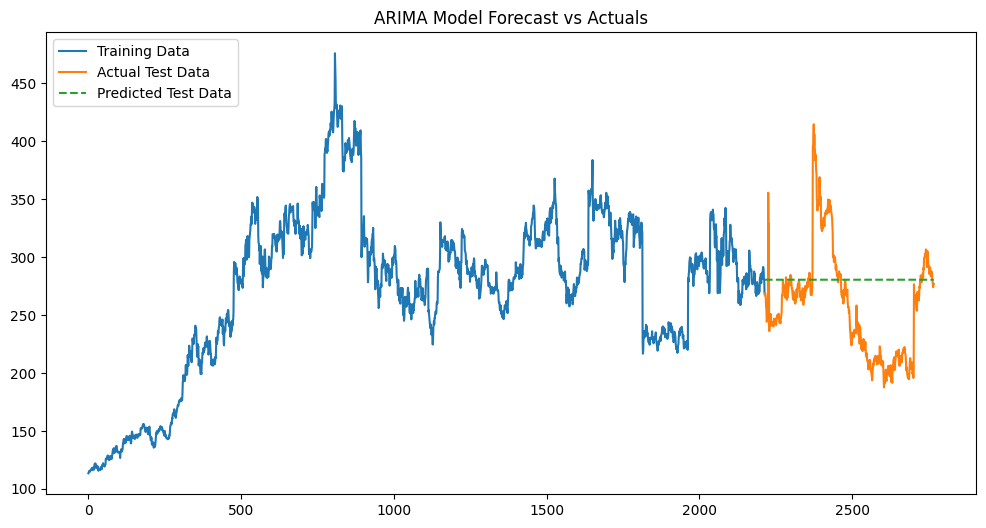

In [6]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# The data downloaded from Yahoo Finance is of 'Timestamp' type. We needs to reset them as positive integers to be read by statsmodels and proceed with the ARIMA model
stock_data = download_stock_data(ticker, start_date, end_date).reset_index(drop=True)
# Create a fake portfolio with an initial investment of 10000 in BIIB
initial_investment = 10000
train_ratio = 0.8
train_data = stock_data['Close'][:int(train_ratio * len(stock_data))]
test_data = stock_data['Close'][int(train_ratio * len(stock_data)):]

initial_shares = initial_investment / train_data.iloc[0]
print(f"Numero iniziale di azioni acquistate: {initial_shares}")

# Use the training set to train the ARIMA model
model = ARIMA(train_data, order=(5,1,1))
model_fit = model.fit()
# Predict stock prices for the test set, the start date is taken from the end of the training set, while the end comes from the test set
forecast_steps = len(test_data)
forecast_start = train_data.index[-1]
forecast_end = test_data.index[-1]
forecast = model_fit.predict(start=forecast_start, end=forecast_end, dynamic=True)

# Mean squared error of the decision as comparison value with other models
mse = mean_squared_error(test_data, forecast[1:])
print(f"Mean Squared Error (MSE) delle previsioni: {mse}")

# Calculate the value of the portfolio based on the ARIMA model
portfolio_value = initial_shares * forecast.iloc[-1]
print(f"Valore previsto del portafoglio alla fine del periodo di test: {portfolio_value:.2f}€")

#plot
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Actual Test Data")
plt.plot(forecast[1:], label="Predicted Test Data", linestyle="--")
plt.title("ARIMA Model Forecast vs Actuals")
plt.legend(loc="upper left")
plt.show()

